In [31]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle
import pandas as pd 
import numpy as np
import scipy


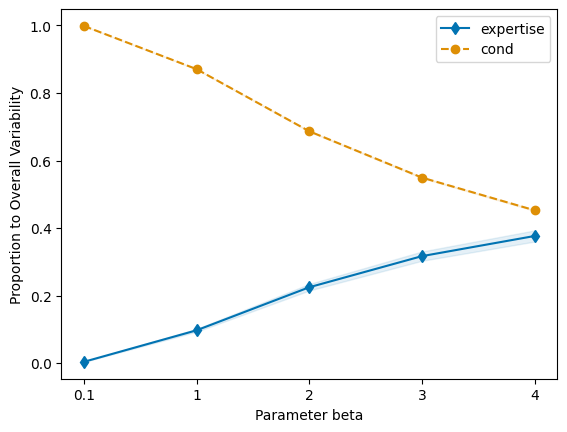

In [32]:
cblind_palete = sns.color_palette("colorblind", as_cmap=True)
gtval = []
gterr = []
condval = []
conderr = []
avval = []
averr = []
ipwval = []
ipwerr = []
paths = ["0.1.txt", "1.0.txt", "2.0.txt", "3.0.txt", "4.0.txt"]
for i in range(len(paths)):
    gt = []
    cond = []
    av = []
    ipw = []
    flag = False
    with open("fig" + paths[i], "r") as myfile:
        for line in myfile:
            if flag:
                flag = False
                temp = line.split("predgt")
                temp = temp[-1].split("cond")
                gt.append(float(temp[0]))
                temp = temp[-1].split("av")
                cond.append(float(temp[0]))
                av.append(float(temp[-1]))
            if "seed" in line:
                flag = True

    gtval.append(np.mean(np.array(gt)))
    gterr.append(scipy.stats.sem(np.array(gt)))
    condval.append(np.mean(np.array(cond)))
    conderr.append(scipy.stats.sem(np.array(cond)))
    avval.append(np.mean(np.array(av)))
    averr.append(scipy.stats.sem(np.array(av)))

xaxis = range(len(paths))
plt.figure()

plt.plot(xaxis, np.array(gtval) / np.array(avval), label="expertise", color=cblind_palete[0], linestyle="-", marker="d")
plt.fill_between(xaxis, (np.array(gtval)-np.array(gterr)) / np.array(avval), (np.array(gtval)+np.array(gterr)) / np.array(avval), alpha=0.1, color=cblind_palete[0])
plt.plot(xaxis, np.array(condval) / np.array(avval), label="cond", color=cblind_palete[1], linestyle="--", marker="o")
plt.fill_between(xaxis, (np.array(condval)-np.array(conderr)) / np.array(avval), (np.array(condval)+np.array(conderr)) / np.array(avval), alpha=0.1, color=cblind_palete[1])
plt.legend()
plt.xlabel("Parameter beta")
plt.ylabel("Proportion to Overall Variability")
labels = ['0.1', '1', '2', '3', '4']
plt.xticks(xaxis, labels)
plt.savefig("propscale.pdf")
plt.show()

betagt = gtval.copy()
betacond = condval.copy()
betaav = avval.copy()

## Expertise and Randomness

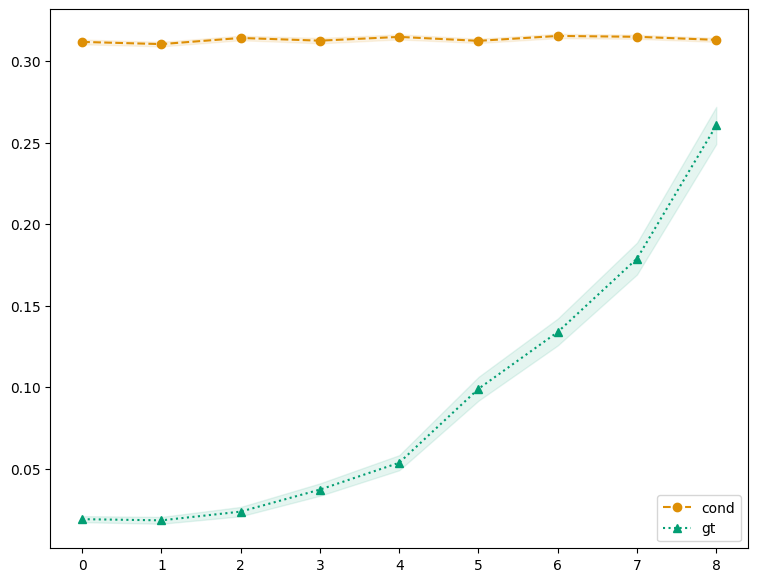

In [33]:
gt = []
cond = []
av = []
tar = []
van = []
with open("fig4.0.txt", "r") as myfile:
    for line in myfile:
        if "seed" in line:
            gt.append(list())
            cond.append(list())
            av.append(list())
            seed = int(line.split("seed: ")[-1])
        else:
            temp = line.split("predgt")
            temp = temp[-1].split("cond")
            gt[seed-1].append(float(temp[0]))
            temp = temp[-1].split("av")
            cond[seed-1].append(float(temp[0]))
            av[seed-1].append(float(temp[-1]))

gtval = np.flip(np.mean(np.array(gt), axis=0))
gterr = np.flip(scipy.stats.sem(np.array(gt), axis=0))
condval = np.flip(np.mean(np.array(cond), axis=0))
conderr = np.flip(scipy.stats.sem(np.array(cond), axis=0))
avval = np.flip(np.mean(np.array(av), axis=0))
averr = np.flip(scipy.stats.sem(np.array(av), axis=0))
xaxis = range(len(gtval))
my_xticks = ['0', '1', '2', '3', '4']

plt.figure(figsize=[9, 7])

plt.plot(xaxis, condval, label="cond", color=cblind_palete[1], linestyle="--", marker="o")
plt.fill_between(xaxis, (condval-conderr), (condval+conderr), alpha=0.1, color=cblind_palete[1])
plt.plot(xaxis, gtval, label="gt", color=cblind_palete[2], linestyle=":", marker="^")
plt.fill_between(xaxis, (gtval-gterr), (gtval+gterr), alpha=0.1, color=cblind_palete[2])

plt.legend()
plt.savefig("feature.pdf")
plt.show()

dgt = gtval.copy()
dcond = condval.copy()
dav = avval.copy()

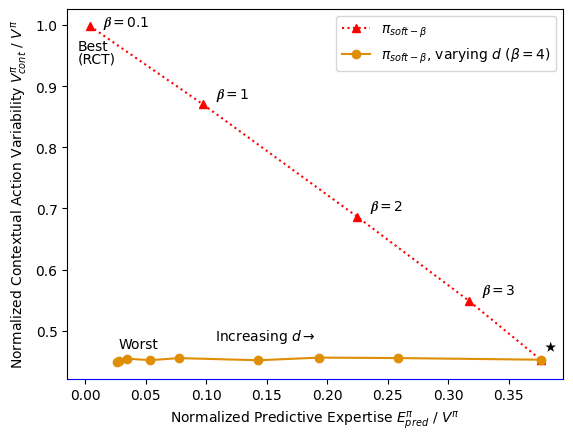

In [34]:
betagt = np.array(betagt) / np.array(betaav)
betacond = np.array(betacond) / np.array(betaav)
dgt = np.array(dgt) / np.array(dav)
dcond = np.array(dcond) / np.array(dav)

ax = plt.axes()
ax.spines['bottom'].set_color("blue")
plt.plot(betagt, betacond, label=r"$\pi_{soft-\beta}$", color="red", linestyle=":", marker="^")
plt.plot(dgt, dcond, label=r"$\pi_{soft-\beta}$, varying $d$ ($\beta = 4$)", color=cblind_palete[1], linestyle="-", marker="o")
plt.legend()
plt.xlabel(r"Normalized Predictive Expertise $E^{\pi}_{pred}$ / $V^{\pi}$")
plt.ylabel(r"Normalized Contextual Action Variability $V^{\pi}_{cont}$ / $V^{\pi}$")

# beta = [r"$𝜷=0.1$", r"$𝜷=1$", r"$𝜷=2$", r"$𝜷=3$", r"$𝜷=4$"]
plt.annotate(r"$𝜷=0.1$", (betagt[0]+0.01, betacond[0]))
plt.annotate("Best", (betagt[0]-0.01, betacond[0]-0.04))
plt.annotate("(RCT)", (betagt[0]-0.01, betacond[0]-0.06))
plt.annotate(r"$𝜷=1$", (betagt[1]+0.01, betacond[1]+0.01))
plt.annotate(r"$𝜷=2$", (betagt[2]+0.01, betacond[2]+0.01))
plt.annotate(r"$𝜷=3$", (betagt[3]+0.01, betacond[3]+0.01))
plt.annotate(r"$\star$", (betagt[4], betacond[4]+0.01), fontsize=20)
plt.annotate("Worst", (dgt[0], dcond[0]+0.02))
plt.annotate(r"Increasing $d \rightarrow$", (dgt[4]+0.03, dcond[4]+0.03))

plt.savefig("fig1.pdf")
plt.show()